In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Rajeev kumar\\Desktop\\AI-Music-recommender-project\\Data\\spotify_millsongdata.csv')
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [68]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df.shape

(57650, 4)

In [71]:
df = df.sample(15000).drop(columns=['link']).reset_index(drop=True)
df.head()

,artist,song,text
0,Michael W. Smith,Anna,Jack is in the corner \r\nThe dish is with th...
1,Marianne Faithfull,Ghost Dance,What is it children that falls from the sky? ...
2,Glee,Don't Make Me Over,Ooh \r\n \r\nDon't make me over \r\nNow tha...
3,Eurythmics,"Oh No, Not You Again","Oh no, not you again \r\nI paid you already ..."
4,Roy Orbison,One More Time,"Tell me one more time, with your hand in mine,..."


In [72]:
df['artist'].unique()

array(['Michael W. Smith', 'Marianne Faithfull', 'Glee', 'Eurythmics',
       'Roy Orbison', 'Robbie Williams', 'Whitesnake', 'Foo Fighters',
       'Morrissey', 'Roxy Music', 'Cat Stevens', 'Justin Bieber',
       'Glen Campbell', 'Hank Williams', 'America', 'Status Quo',
       'Ariel Rivera', 'Chaka Khan', 'Leonard Cohen', 'Harry Belafonte',
       'Beautiful South', 'Alison Krauss', 'Neil Sedaka', 'Kyla',
       'Tom Waits', 'Beach Boys', 'John Martyn', 'Pharrell Williams',
       'David Bowie', 'Allman Brothers Band', 'Queen Adreena',
       'Johnny Cash', 'Fabolous', 'Nat King Cole', 'Drake', 'Death',
       'Hank Williams Jr.', 'Alice Cooper', 'Foreigner', 'NOFX',
       'Otis Redding', 'Elton John', 'Vince Gill', 'Extreme',
       'Snoop Dogg', "Old 97's", 'Lou Reed', 'Nazareth', 'Bette Midler',
       'Indigo Girls', 'Andrea Bocelli', 'Housemartins', 'Elvis Presley',
       'Maroon 5', 'Black Sabbath', 'Fastball', 'Queen', 'Pearl Jam',
       'Billie Holiday', 'Wanda Jackson',

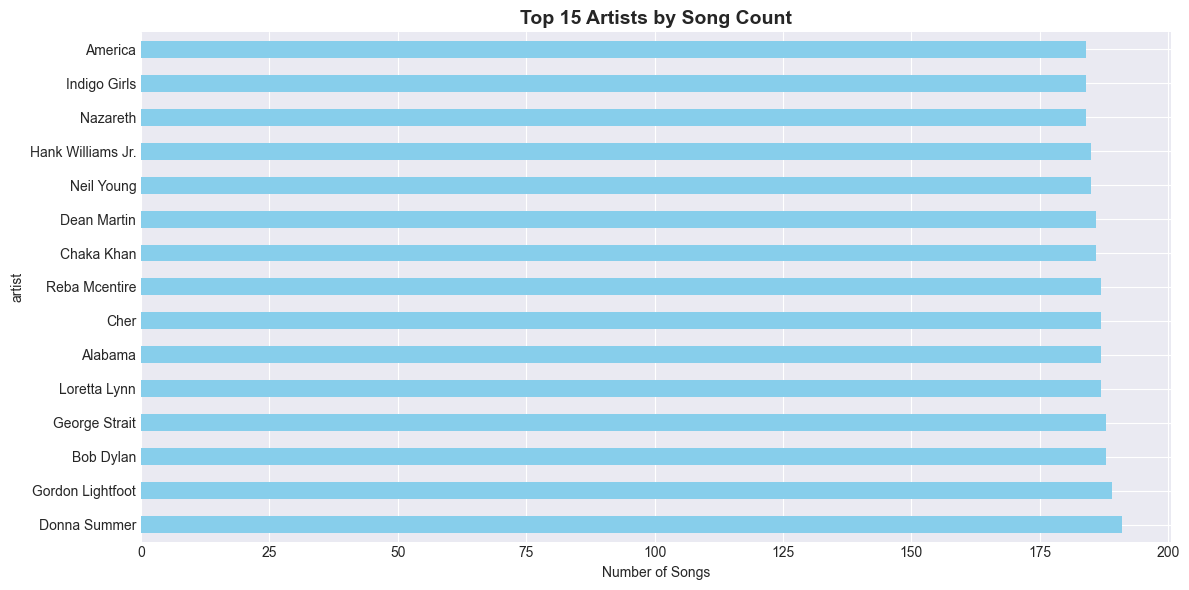

Top 15 Artists:
artist
Donna Summer         191
Gordon Lightfoot     189
Bob Dylan            188
George Strait        188
Loretta Lynn         187
Alabama              187
Cher                 187
Reba Mcentire        187
Chaka Khan           186
Dean Martin          186
Neil Young           185
Hank Williams Jr.    185
Nazareth             184
Indigo Girls         184
America              184
Name: count, dtype: int64


In [9]:
top_artists = df['artist'].value_counts().head(15)
plt.figure(figsize=(12, 6))
top_artists.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Songs')
plt.title('Top 15 Artists by Song Count', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print("Top 15 Artists:")
print(top_artists)

In [74]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex=True)

In [75]:
df

,artist,song,text
0,Michael W. Smith,Anna,jack is in the corner \r the dish is with the...
1,Marianne Faithfull,Ghost Dance,what is it children that falls from the sky? ...
2,Glee,Don't Make Me Over,ooh \r \r don't make me over \r now that i...
3,Eurythmics,"Oh No, Not You Again","oh no, not you again \r i paid you already \..."
4,Roy Orbison,One More Time,"tell me one more time, with your hand in mine,..."
...,...,...,...
14995,ZZ Top,Sure Got Cold After The Rain Fell,"rain fell this mornin', make me feel so bad \..."
14996,Gordon Lightfoot,Couchiching,"there's a town they call orillia, it is there ..."
14997,Jennifer Lopez,Dance With Me,too much is on your mind \r gotta let it go ...
14998,Elvis Presley,Cross My Heart And Hope To Die,i can't explain about last night \r though th...


### Vectorizing

In [76]:
import nltk
from nltk.stem.porter import PorterStemmer

In [77]:
import nltk
nltk.download('punkt', download_dir=r"c:\Users\Rajeev kumar\Desktop\Music recommendation system project\venv\nltk_data")



[nltk_data] Downloading package punkt to c:\Users\Rajeev
[nltk_data]     kumar\Desktop\Music recommendation system
[nltk_data]     project\venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\Rajeev
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rajeev
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
stemmer = PorterStemmer()

In [80]:
# Tokenization and Stemming
from nltk.tokenize import wordpunct_tokenize

def token(txt):
    token = wordpunct_tokenize(txt)
    a = [stemmer.stem(w) for w in token]
    return " ".join(a)


In [81]:
token("you are beautiful")

'you are beauti'

In [82]:
df['text'].apply(lambda x: token(x))

0        jack is in the corner the dish is with the spo...
1        what is it children that fall from the sky ? t...
2        ooh don ' t make me over now that i ' d do any...
3        oh no , not you again i paid you alreadi too m...
4        tell me one more time , with your hand in mine...
                               ...                        
14995    rain fell thi mornin ', make me feel so bad on...
14996    there ' s a town they call orillia , it is the...
14997    too much is on your mind gotta let it go can '...
14998    i can ' t explain about last night though thin...
14999    angel we have heard on high sweetli sing o ' e...
Name: text, Length: 15000, dtype: object

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [85]:
# creating the tf-idf matrix
vec = tfidf.fit_transform(df['text'])

In [86]:
# Calculating the cosine similarity matrix
cosine_similarity(vec)

array([[1.        , 0.00732877, 0.00390333, ..., 0.00730806, 0.09853676,
        0.        ],
       [0.00732877, 1.        , 0.00667815, ..., 0.02849763, 0.02758028,
        0.00157797],
       [0.00390333, 0.00667815, 1.        , ..., 0.01798207, 0.07630579,
        0.00286715],
       ...,
       [0.00730806, 0.02849763, 0.01798207, ..., 1.        , 0.05047612,
        0.00856492],
       [0.09853676, 0.02758028, 0.07630579, ..., 0.05047612, 1.        ,
        0.        ],
       [0.        , 0.00157797, 0.00286715, ..., 0.00856492, 0.        ,
        1.        ]], shape=(15000, 15000))

In [87]:
similar = cosine_similarity(vec)

In [88]:
similar[1]

array([0.00732877, 1.        , 0.00667815, ..., 0.02849763, 0.02758028,
       0.00157797], shape=(15000,))

In [89]:
df[df['song'] == 'Silver Blue']

,artist,song,text


In [90]:
# creating the tf-idf matrix
X = tfidf.fit_transform(df['text'])

In [91]:
import faiss

In [92]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=256, random_state=42)
X_reduced = svd.fit_transform(X)

X_reduced = X_reduced.astype("float32")
faiss.normalize_L2(X_reduced)


In [93]:
dim = X_reduced.shape[1]
index = faiss.IndexFlatIP(dim)
index.add(X_reduced)



In [94]:
import pickle
np.save("music_embeddings.npy", X_reduced)
faiss.write_index(index, "music_faiss.index")



In [95]:
with open("df.pkl", "wb") as f:
    pickle.dump(df, f)

Initially, we used cosine similarity, but it resulted in a 1.6 GB similarity matrix, which was inefficient and not scalable.
To optimize performance, we transitioned to embedding-based representations and implemented FAISS for approximate nearest neighbor search, enabling faster, memory-efficient, and real-time recommendations.